## Load necessary modules

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
# from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# # use this to change which GPU to use
# gpu = 0

# # set the modified tf session as backend in keras
# setup_gpu(gpu)

Using TensorFlow backend.


## Load RetinaNet model

In [2]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('..', 'snapshots', 'resnet50_coco_best_v2.1.0.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

Instructions for updating:
Colocations handled automatically by placer.
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


C:\Users\dlawo\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Run detection on example

(344, 440, 3)
(800, 1023, 3) 2.3255813953488373
processing time:  14.582103967666626


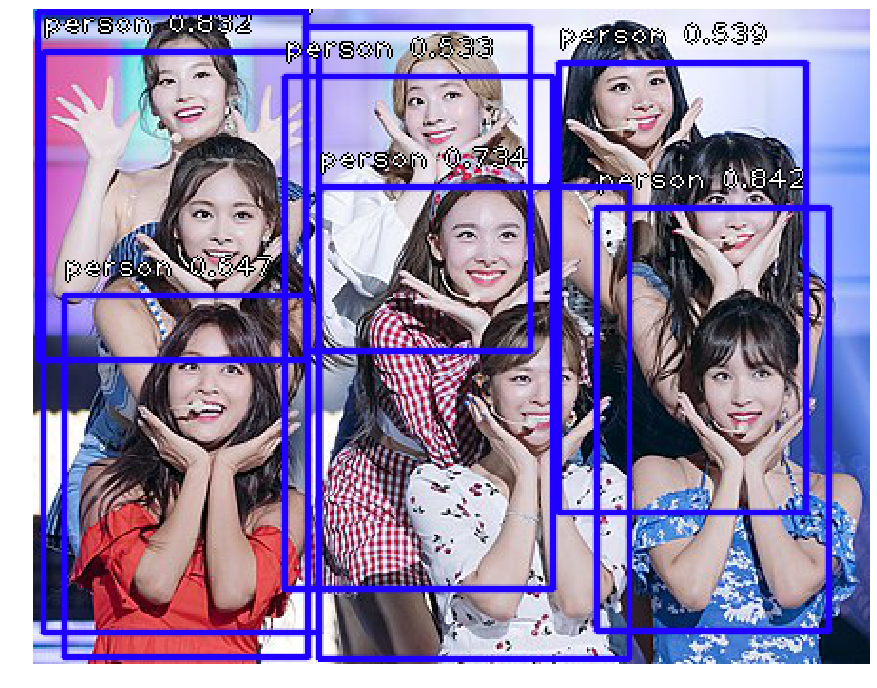

In [3]:
# load image
image = read_image_bgr('twice.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [4]:
boxes.shape, scores.shape, labels.shape

((1, 300, 4), (1, 300), (1, 300))

In [5]:
boxes[0], scores[0], labels[0]

(array([[296.5959   , 104.31192  , 418.21906  , 326.76328  ],
        [  5.3751035,  22.49755  , 150.72481  , 327.67288  ],
        [150.30252  ,  93.98422  , 313.16553  , 341.7769   ],
        ...,
        [ -0.43     ,  -0.43     ,  -0.43     ,  -0.43     ],
        [ -0.43     ,  -0.43     ,  -0.43     ,  -0.43     ],
        [ -0.43     ,  -0.43     ,  -0.43     ,  -0.43     ]],
       dtype=float32),
 array([ 0.8417463 ,  0.83230025,  0.7341399 ,  0.64731634,  0.6016803 ,
         0.5976292 ,  0.5388845 ,  0.5327913 ,  0.4556086 ,  0.45294505,
         0.44164726,  0.37894738,  0.37631744,  0.30676985,  0.28733605,
         0.2692052 ,  0.19306841,  0.18639192,  0.18158832,  0.1796582 ,
         0.1714392 ,  0.17095941,  0.16672444,  0.16607395,  0.15462068,
         0.15046921,  0.1496714 ,  0.14877996,  0.1479738 ,  0.14391267,
         0.14302167,  0.13712186,  0.13662255,  0.13588017,  0.13538298,
         0.13497025,  0.1336031 ,  0.13043955,  0.12848008,  0.12710914,
       

## 후처리를 위한 Data 처리

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

def draw_bounding_boxes_on_images(images, results, class_info, thresold=0.5):
	for i, img in enumerate(images):
		# Parse the outputs. each result contains many boxes.
		det_label = results[i][:, 0]
		det_conf = results[i][:, 1]
		det_xmin = results[i][:, 2]
		det_ymin = results[i][:, 3]
		det_xmax = results[i][:, 4]
		det_ymax = results[i][:, 5] 

		# Get detections with confidence higher than thresold <- probability
		top_indices = [i for i, conf in enumerate(det_conf) if conf >= thresold]
		top_conf = det_conf[top_indices]
		top_label_indices = det_label[top_indices].tolist()
		top_xmin = det_xmin[top_indices]
		top_ymin = det_ymin[top_indices]
		top_xmax = det_xmax[top_indices]
		top_ymax = det_ymax[top_indices]

		colors = plt.cm.hsv(np.linspace(0, 1, len(class_info) )).tolist() 

		plt.imshow(img / 255.)
		currentAxis = plt.gca()

		for box_idx in range(top_conf.shape[0]):
			print('segmentation_{}'.format(box_idx))
			xmin = top_xmin[box_idx]
			ymin = top_ymin[box_idx]
			xmax = top_xmax[box_idx]
			ymax = top_ymax[box_idx]
			score = top_conf[box_idx]
			label = int(top_label_indices[box_idx])
			label_name = class_info[label - 1] 
			display_txt = '{:0.2f}, {}'.format(score, label_name)
			coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
			color = colors[label]
			currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
			currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5}) 
			
		plt.savefig('result_plt.png')

In [7]:
class_info = [labels_to_names[i] for i in range(0, len(labels_to_names.keys()))]
images = [image]
results = []
for idx in range(len(images)): 
    results.append([])
    for box, score, label in zip(boxes[idx], scores[idx], labels[idx]): 
        results[idx].append([label + 1 , score] + box.tolist()) 
results = np.array(results)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


segmentation_0
segmentation_1
segmentation_2
segmentation_3
segmentation_4
segmentation_5
segmentation_6
segmentation_7


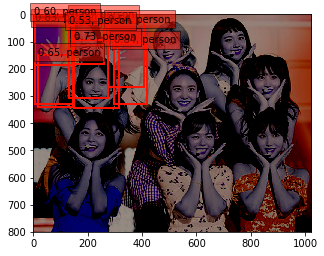

In [11]:
draw_bounding_boxes_on_images(images, results, class_info)

In [9]:
len(class_info)

80

In [10]:
class_info[1]

'bicycle'

segmentation_0
segmentation_1
segmentation_2
segmentation_3
segmentation_4
segmentation_5
segmentation_6
segmentation_7


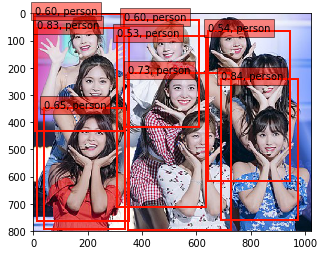

In [41]:
from keras.preprocessing import image 
from scipy.misc import imread
from skimage import io
 
class_info = [labels_to_names[i] for i in range(0, len(labels_to_names.keys()))]

images = []
draws = [] 
img_path = './twice.jpg'
img = image.load_img(img_path)
img = image.img_to_array(img)
draws.append(resize_image(img)[0])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = preprocess_image(img)
img, scale = resize_image(img)
images.append(img)

boxes, scores, labels = model.predict_on_batch(np.array(images))

results = []
for idx in range(len(images)): 
    results.append([])
    for box, score, label in zip(boxes[idx], scores[idx], labels[idx]): 
        results[idx].append([label + 1, score] + box.tolist()) 
results = np.array(results)

draw_bounding_boxes_on_images(draws, results ,class_info, thresold=0.5)